In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
files = os.listdir(r'C:\Users\nirma\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')

In [3]:
path = r'C:\Users\nirma\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
all_month_data = pd.DataFrame()

In [4]:
for file in files:
    current= pd.read_csv(path + '/' + file)
    all_month_data = pd.concat([all_month_data,current])
all_month_data.to_csv('all_data.csv',index=False)

In [5]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
all_data.duplicated().sum()

1162

In [8]:
all_data.drop_duplicates(inplace=True)

In [9]:
all_data.duplicated().sum()

0

In [10]:
all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

In [11]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

In [13]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')

# Q1. what was the best month for sales?

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =pd.to_numeric(all_data['Price Each'])

In [15]:
all_data['sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [16]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [17]:
data=all_data.groupby('month').sum()

Text(0.5, 0, 'months')

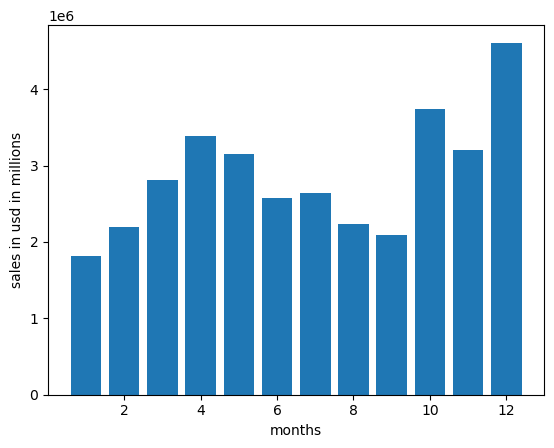

In [18]:
month=range(1,13)
plt.bar(month,data['sales'])
plt.ylabel('sales in usd in millions')
plt.xlabel('months')

In [19]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1])

In [20]:
result=all_data.groupby('city').sum()

In [21]:
cities = list(result.index.values)

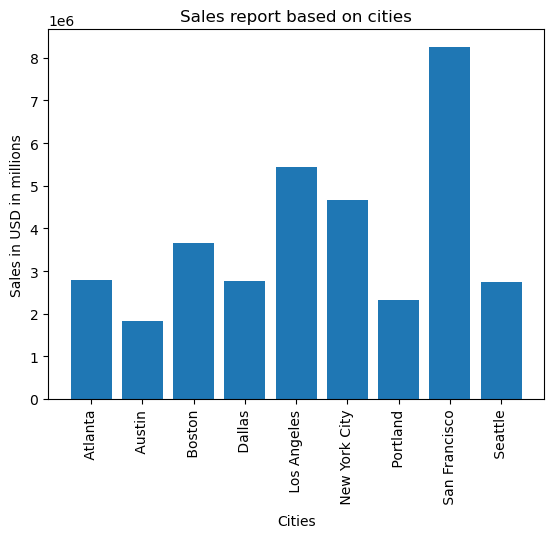

In [22]:
plt.bar(cities,result['sales'])
plt.xticks(cities,rotation='vertical', size=10)
plt.ylabel('Sales in USD in millions')
plt.xlabel('Cities')
plt.title('Sales report based on cities')
plt.show()

In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['hours']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute

In [25]:
based_on_hour=all_data.groupby('hours').count()

In [26]:
x_axis = list(based_on_hour.index.values)

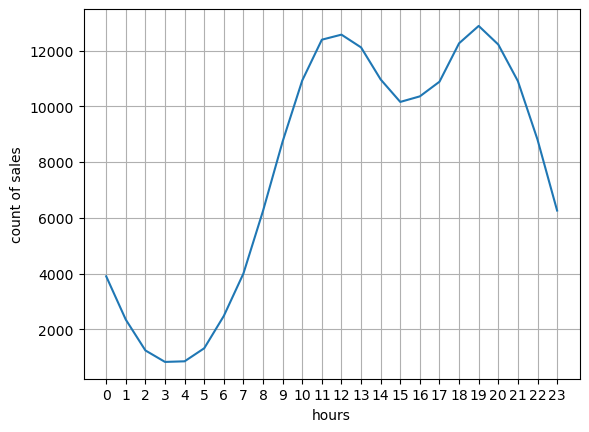

In [27]:
plt.plot(x_axis,based_on_hour['sales'])
plt.xticks(x_axis)
plt.ylabel('count of sales')
plt.xlabel('hours')
plt.grid()

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27
